In [ ]:
import tensorflow as tf
import numpy as np

# Text Genreation

## simple

In [ ]:
# Texte d'exemple
text_data = """Ensao offre des formations en ingénierie. La filière Data Science et
Cloud Computing DSCC est dédiée aux sciences des données et à la gestion des infrastructures cloud."""

In [ ]:
# Créer un vocabulaire unique
vocab = sorted(set(text_data))
char2index = {char: idx for idx, char in enumerate(vocab)}
index2char = np.array(vocab)
index2char

array(['\n', ' ', '.', 'C', 'D', 'E', 'L', 'S', 'a', 'c', 'd', 'e', 'f',
       'g', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'x', 'à',
       'è', 'é'], dtype='<U1')

In [ ]:
char2index

{'\n': 0,
 ' ': 1,
 '.': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'L': 6,
 'S': 7,
 'a': 8,
 'c': 9,
 'd': 10,
 'e': 11,
 'f': 12,
 'g': 13,
 'i': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'p': 19,
 'r': 20,
 's': 21,
 't': 22,
 'u': 23,
 'x': 24,
 'à': 25,
 'è': 26,
 'é': 27}

In [ ]:
# Convertir le texte en indices
text_as_int = np.array([char2index[c] for c in text_data])
text_as_int

array([ 5, 17, 21,  8, 18,  1, 18, 12, 12, 20, 11,  1, 10, 11, 21,  1, 12,
       18, 20, 16,  8, 22, 14, 18, 17, 21,  1, 11, 17,  1, 14, 17, 13, 27,
       17, 14, 11, 20, 14, 11,  2,  1,  6,  8,  1, 12, 14, 15, 14, 26, 20,
       11,  1,  4,  8, 22,  8,  1,  7,  9, 14, 11, 17,  9, 11,  1, 11, 22,
        0,  3, 15, 18, 23, 10,  1,  3, 18, 16, 19, 23, 22, 14, 17, 13,  1,
        4,  7,  3,  3,  1, 11, 21, 22,  1, 10, 27, 10, 14, 27, 11,  1,  8,
       23, 24,  1, 21,  9, 14, 11, 17,  9, 11, 21,  1, 10, 11, 21,  1, 10,
       18, 17, 17, 27, 11, 21,  1, 11, 22,  1, 25,  1, 15,  8,  1, 13, 11,
       21, 22, 14, 18, 17,  1, 10, 11, 21,  1, 14, 17, 12, 20,  8, 21, 22,
       20, 23,  9, 22, 23, 20, 11, 21,  1,  9, 15, 18, 23, 10,  2])

In [ ]:
# Paramètres des séquences
SEQ_LENGTH = 10  # Longueur des séquences pour entraîner le modèle
BATCH_SIZE = 8
BUFFER_SIZE = 100

In [ ]:
# Créer les séquences d'entrée et de sortie
input_data = []
target_data = []

for i in range(len(text_as_int) - SEQ_LENGTH):
    input_data.append(text_as_int[i:i+SEQ_LENGTH])
    target_data.append(text_as_int[i+1:i+SEQ_LENGTH+1])

input_data = np.array(input_data)
target_data = np.array(target_data)

In [ ]:
input_data[:1]

array([[ 5, 17, 21,  8, 18,  1, 18, 12, 12, 20]])

In [ ]:
target_data[:1]

array([[17, 21,  8, 18,  1, 18, 12, 12, 20, 11]])

In [ ]:
index2char[input_data[:1]]

array([['E', 'n', 's', 'a', 'o', ' ', 'o', 'f', 'f', 'r']], dtype='<U1')

In [ ]:
index2char[target_data[:1]]

array([['n', 's', 'a', 'o', ' ', 'o', 'f', 'f', 'r', 'e']], dtype='<U1')

In [ ]:
# Créer un dataset TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((input_data, target_data))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Paramètres du modèle
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 32
RNN_UNITS = 64
EPOCHS=200

## RNN

In [ ]:
def build_rnn_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
        tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

# Créer et compiler le modèle
model_rnn = build_rnn_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_rnn.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Entraîner le modèle

history_rnn=model_rnn.fit(dataset, epochs=EPOCHS)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2811
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9987
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8415
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6211
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4308
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2645
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0563
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8764
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7596
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5852
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4577
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3675
Epoch 13/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2459
Epoch 14/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1457
Epoch 15/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0554
Epoch 16/200
19/

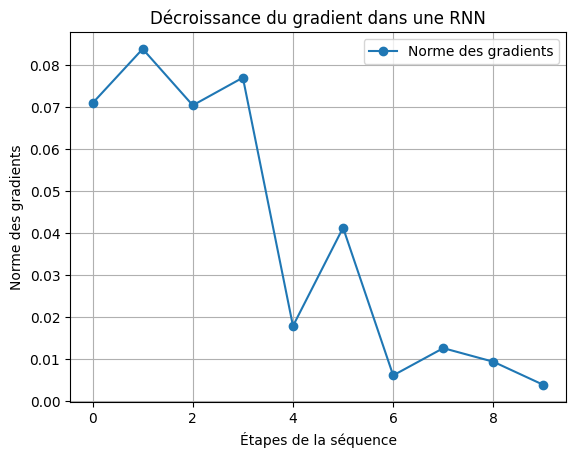

In [ ]:
# Exemple de données d'entrée et de cible
input_example = input_data[:1]  # Prendre la première séquence d'entrée
target_example = target_data[:1]  # Prendre la première séquence cible

# Calcul des gradients par rapport aux sorties de la couche RNN
with tf.GradientTape() as tape:
    # Activer le suivi des sorties de la couche RNN
    embeddings = model_rnn.layers[0](input_example)  # Couche Embedding
    rnn_outputs = model_rnn.layers[1](embeddings)  # Couche SimpleRNN
    predictions = model_rnn.layers[2](rnn_outputs)  # Couche Dense

    # Calcul de la perte
    loss = tf.keras.losses.sparse_categorical_crossentropy(target_example, predictions, from_logits=True)

# Gradients de la perte par rapport aux sorties de la couche RNN
gradients = tape.gradient(loss, rnn_outputs)

# Calcul de la norme des gradients à chaque étape de la séquence
gradient_norms = [tf.norm(gradients[:, t, :]).numpy() for t in range(SEQ_LENGTH)]

# Tracé de la courbe
import matplotlib.pyplot as plt

plt.plot(range(SEQ_LENGTH), gradient_norms, marker='o', label='Norme des gradients')
plt.xlabel('Étapes de la séquence')
plt.ylabel('Norme des gradients')
plt.title('Décroissance du gradient dans une RNN')
plt.legend()
plt.grid(True)
plt.show()

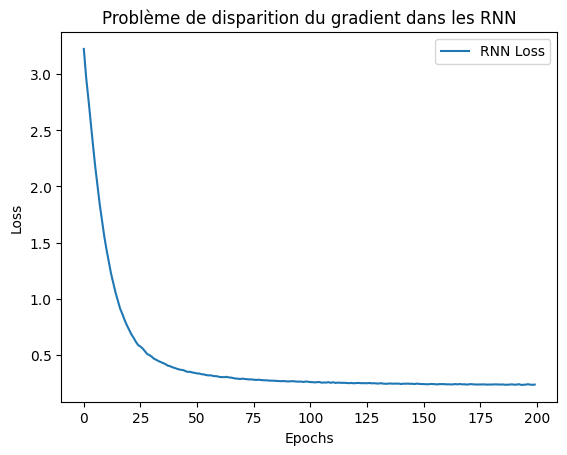

In [ ]:
# Affichage de la perte au fil des époques
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['loss'], label='RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Problème de disparition du gradient dans les RNN')
plt.legend()
plt.show()

## LSTM

In [ ]:
# Construire un modèle LSTM
def build_model_lstm(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


# Créer et compiler le modèle
model_lstm = build_model_lstm(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_lstm.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Entraîner le modèle

model_lstm.fit(dataset, epochs=EPOCHS)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.3172
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1741
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0092
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9902
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9506
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8831
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7666
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6583
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5514
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3731
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2485
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1242
Epoch 13/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0889
Epoch 14/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9369
Epoch 15/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7924
Epoc

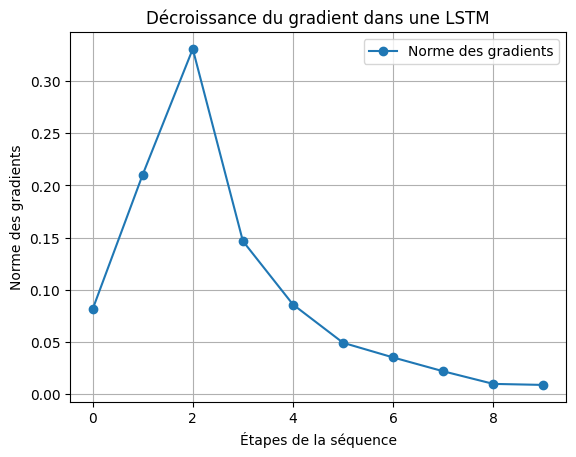

In [ ]:
# Exemple de données d'entrée et de cible
input_example = input_data[:1]  # Prendre la première séquence d'entrée
target_example = target_data[:1]  # Prendre la première séquence cible

# Calcul des gradients par rapport aux sorties de la couche LSTM
with tf.GradientTape() as tape:
    # Activer le suivi des sorties de la couche LSTM
    embeddings = model_lstm.layers[0](input_example)  # Couche Embedding
    lstm_outputs = model_lstm.layers[1](embeddings)  # Couche LSTM
    predictions = model_lstm.layers[2](lstm_outputs)  # Couche Dense

    # Calcul de la perte
    loss = tf.keras.losses.sparse_categorical_crossentropy(target_example, predictions, from_logits=True)

# Gradients de la perte par rapport aux sorties de la couche LSTM
gradients = tape.gradient(loss, lstm_outputs)

# Calcul de la norme des gradients à chaque étape de la séquence
gradient_norms = [tf.norm(gradients[:, t, :]).numpy() for t in range(SEQ_LENGTH)]

# Tracé de la courbe
import matplotlib.pyplot as plt

plt.plot(range(SEQ_LENGTH), gradient_norms, marker='o', label='Norme des gradients')
plt.xlabel('Étapes de la séquence')
plt.ylabel('Norme des gradients')
plt.title('Décroissance du gradient dans une LSTM')
plt.legend()
plt.grid(True)
plt.show()

## GRU

In [ ]:
def build_gru_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
        tf.keras.layers.GRU(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

# Créer et compiler le modèle
model_gru = build_gru_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_gru.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Entraîner le modèle

model_gru.fit(dataset, epochs=EPOCHS)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.3069
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1204
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9500
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8805
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7454
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5653
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4074
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2241
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1219
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9432
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8177
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6751
Epoch 13/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5331
Epoch 14/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4118
Epoch 15/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2893
Epoc

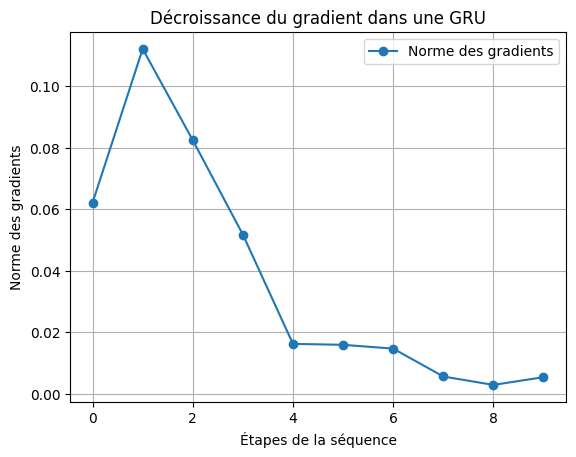

In [ ]:
# Exemple de données d'entrée et de cible
input_example = input_data[:1]  # Prendre la première séquence d'entrée
target_example = target_data[:1]  # Prendre la première séquence cible

# Calcul des gradients par rapport aux sorties de la couche GRU
with tf.GradientTape() as tape:
    # Activer le suivi des sorties de la couche GRU
    embeddings = model_gru.layers[0](input_example)  # Couche Embedding
    gru_outputs = model_gru.layers[1](embeddings)  # Couche GRU
    predictions = model_gru.layers[2](gru_outputs)  # Couche Dense

    # Calcul de la perte
    loss = tf.keras.losses.sparse_categorical_crossentropy(target_example, predictions, from_logits=True)

# Gradients de la perte par rapport aux sorties de la couche GRU
gradients = tape.gradient(loss, gru_outputs)

# Calcul de la norme des gradients à chaque étape de la séquence
gradient_norms = [tf.norm(gradients[:, t, :]).numpy() for t in range(SEQ_LENGTH)]

# Tracé de la courbe
import matplotlib.pyplot as plt

plt.plot(range(SEQ_LENGTH), gradient_norms, marker='o', label='Norme des gradients')
plt.xlabel('Étapes de la séquence')
plt.ylabel('Norme des gradients')
plt.title('Décroissance du gradient dans une GRU')
plt.legend()
plt.grid(True)
plt.show()

## LSTM avec Attention

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LayerNormalization
# Définir la couche d'attention
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()
        self.attention = tf.keras.layers.Attention(use_scale=True)

    def call(self, query, value):
        score = self.attention([query, value, value])  # Utiliser query, key, value
        return score

# Définir le modèle LSTM avec Attention
def build_lstm_with_attention(vocab_size, embedding_dim, rnn_units, seq_length):
    input_layer = tf.keras.layers.Input(shape=(seq_length,))
    embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)(input_layer)
    lstm = tf.keras.layers.LSTM(rnn_units, return_sequences=True)(embedding)
    context_vector = Attention()(lstm, lstm)
    context_vector = LayerNormalization()(context_vector)  # Normalisation pour stabiliser l'entraînement
    output = tf.keras.layers.Dense(vocab_size)(context_vector)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

# Créer et compiler le modèle
model_lstm_att = build_lstm_with_attention(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, SEQ_LENGTH)
model_lstm_att.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model_lstm_att.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 10, 32)         │            896 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 10, 64)         │         24,832 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 10, 64)         │              1 │ lstm_1[0][0],          │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 10, 64)         │            128 │ attention[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10, 28)         │          1,820 │ layer_normalization[0… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 27,677 (108.11 KB)

 Trainable params: 27,677 (108.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entraîner le modèle
history_lstm_att = model_lstm_att.fit(dataset, epochs=EPOCHS)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.1210
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7885
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6107
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5469
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4651
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3949
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3471
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3042
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3000
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2369
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2487
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1844
Epoch 13/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2001
Epoch 14/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1278
Epoch 15/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0898
Epoc

## Transformers

In [ ]:
def build_transformer_model(vocab_size, embedding_dim, num_heads, ff_dim, num_layers):
    input_layer = tf.keras.layers.Input(shape=(SEQ_LENGTH,))
    embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)(input_layer)

    # Encoder avec des couches Multi-Head Attention
    for _ in range(num_layers):
        attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(embedding, embedding)
        attention = tf.keras.layers.LayerNormalization()(attention)
        attention = tf.keras.layers.Add()([embedding, attention])
        ff = tf.keras.layers.Dense(ff_dim, activation="relu")(attention)
        ff = tf.keras.layers.Dense(embedding_dim)(ff)
        embedding = tf.keras.layers.Add()([attention, ff])

    output = tf.keras.layers.Dense(vocab_size)(embedding)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model


# Créer et compiler le modèle Transformer
model_transformer = build_transformer_model(VOCAB_SIZE, EMBEDDING_DIM, num_heads=4, ff_dim=128, num_layers=2)
model_transformer.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Entraîner le modèle Transformer

model_transformer.fit(dataset, epochs=EPOCHS)


Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.2185
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8116
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6472
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5320
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3692
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3164
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2133
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1558
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0263
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8379
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7178
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6150
Epoch 13/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4909
Epoch 14/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4143
Epoch 15/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2483
Epoc

## Comparaison

Évaluation du modèle RNN...
Évaluation du modèle LSTM...
Évaluation du modèle GRU...
Évaluation du modèle LSTM avec Attention...
Évaluation du modèle Transformer...

Résultats de la comparaison des modèles :
RNN : Perte finale = 0.2246
LSTM : Perte finale = 0.2239
GRU : Perte finale = 0.2197
LSTM avec Attention : Perte finale = 0.0409
Transformer : Perte finale = 0.3168


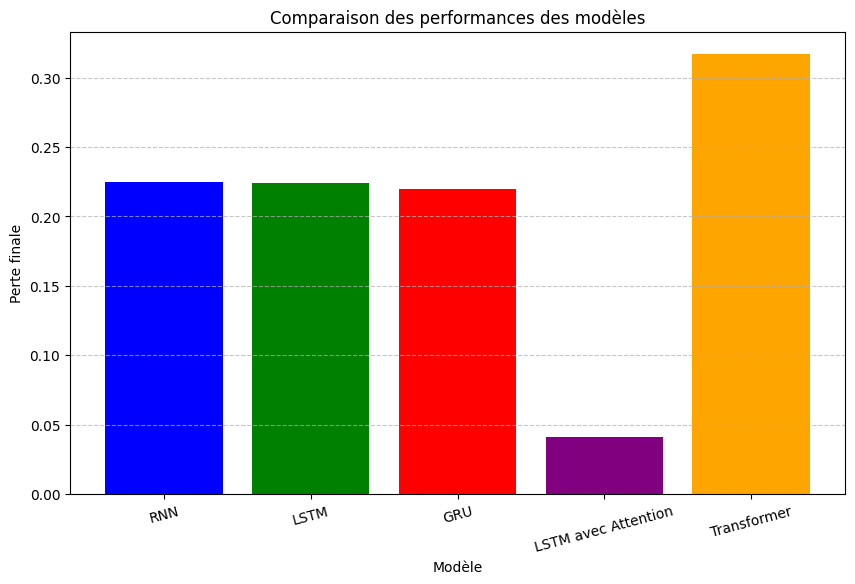

In [ ]:
from matplotlib import pyplot as plt

# Comparer les modèles après l'entraînement
def compare_models(models, dataset):
    results = {}

    for model_name, model in models.items():
        print(f"Évaluation du modèle {model_name}...")
        loss = model.evaluate(dataset, verbose=0)  # Réduire l'affichage pendant l'évaluation
        results[model_name] = loss

    # Afficher les résultats
    print("\nRésultats de la comparaison des modèles :")
    for model_name, loss in results.items():
        print(f"{model_name} : Perte finale = {loss:.4f}")

    # Visualiser la comparaison
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Modèle')
    plt.ylabel('Perte finale')
    plt.title('Comparaison des performances des modèles')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return results

# Liste des modèles entraînés
trained_models = {
    "RNN": model_rnn,
    "LSTM": model_lstm,
    "GRU": model_gru,
    "LSTM avec Attention": model_lstm_att,
    "Transformer": model_transformer
}

# Comparer les performances
model_results = compare_models(trained_models, dataset)


## TEST

In [ ]:
# Fonction de génération de texte
def generate_text(model, start_string, num_generate=35, temperature=1.0):
    input_indices = [char2index.get(s, 0) for s in start_string]

    # Compléter ou tronquer la séquence pour correspondre à SEQ_LENGTH
    if len(input_indices) < SEQ_LENGTH:
        input_indices = [0] * (SEQ_LENGTH - len(input_indices)) + input_indices  # Padding
    else:
        input_indices = input_indices[-SEQ_LENGTH:]  # Tronquer à SEQ_LENGTH

    input_indices = tf.expand_dims(input_indices, 0)

    text_generated = []


    for _ in range(num_generate):
        predictions = model(input_indices)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()

        text_generated.append(index2char[predicted_id])

        # Mettre à jour l'entrée pour inclure le dernier caractère prédit
        input_indices = np.append(input_indices.numpy()[0][1:], predicted_id)  # Décaler la séquence
        input_indices = tf.expand_dims(input_indices, 0)

    return start_string + ''.join(text_generated)

In [ ]:
# Exemple de génération de texte
print(generate_text(model_rnn, start_string="ensao", temperature=0.1))

ensao offre des formations en ingénierie


In [ ]:
# Exemple de génération de texte
print(generate_text(model_lstm, start_string="DSCC", temperature=0.3))

DSCC est dédiée aux sciences des donnée


In [ ]:
# Exemple de génération de texte
print(generate_text(model_gru, start_string="ensao", temperature=0.5))

ensao offre des formations en ingénierie


In [ ]:
def generate_text2(model, start_string, num_generate=100, temperature=1.0):
    """
    Génère du texte à partir d'une chaîne de départ.

    Args:
        model: Le modèle entraîné (LSTM avec Attention).
        start_string: La chaîne de départ pour la génération.
        num_generate: Le nombre de caractères à générer.
        temperature: Paramètre de contrôle de la créativité (plus élevé = plus aléatoire).

    Returns:
        Texte généré.
    """
    # Convertir la chaîne de départ en indices
    input_indices = [char2index[char] for char in start_string]

    # Compléter ou tronquer la séquence pour correspondre à SEQ_LENGTH
    if len(input_indices) < SEQ_LENGTH:
        input_indices = [0] * (SEQ_LENGTH - len(input_indices)) + input_indices  # Padding
    else:
        input_indices = input_indices[-SEQ_LENGTH:]  # Tronquer à SEQ_LENGTH

    input_indices = tf.expand_dims(input_indices, 0)  # Ajouter une dimension de batch

    text_generated = []

    for _ in range(num_generate):
        # Prédire le prochain caractère
        predictions = model(input_indices)
        predictions = predictions[:, -1, :] / temperature  # Prendre la dernière étape
        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()

        # Ajouter le caractère prédit à la séquence générée
        text_generated.append(index2char[predicted_id])

        # Mettre à jour l'entrée pour inclure le dernier caractère prédit
        input_indices = tf.concat([input_indices[:, 1:], tf.expand_dims([predicted_id], 1)], axis=1)

    return start_string + ''.join(text_generated)

In [ ]:
# Exemple de génération de texte avec LSTM et Attention
start_string = "ensao "
generated_text = generate_text2(model_lstm_att, start_string, num_generate=35, temperature=0.34)
print("LSTM avec Attention :", generated_text)

LSTM avec Attention : ensao  CCCCC dddééééee      llliien  ee  


In [ ]:
# Exemple de génération de texte
print(generate_text2(model_transformer, start_string="ensao ", temperature=0.3))

ensao ennnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn


## utiliser GloVe
Avantages :

Meilleure initialisation : Les embeddings pré-entraînés capturent déjà des relations sémantiques et syntaxiques.

Réduction du temps d'entraînement : Le modèle n'a pas besoin d'apprendre les embeddings à partir de zéro.

Performances améliorées : Surtout pour les petits jeux de données, où le modèle n'a pas assez de données pour apprendre de bons embeddings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
file_path = '/content/drive/MyDrive/txt/glove.6B.100d.txt'



In [ ]:
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

print(text_data[:1000])  # Afficher les 1000 premiers caractères pour vérifier

In [ ]:
import tensorflow as tf
import numpy as np
import re
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Texte initial agrandi
text_data = """
Ensao offre des formations en ingénierie. La filière Data Science et Cloud Computing (DSCC) est dédiée aux sciences des données et à la gestion des infrastructures cloud.
L'apprentissage des modèles de machine learning et des techniques de deep learning est au cœur de cette filière. Les étudiants apprennent également à déployer des applications sur des plateformes cloud comme AWS, Google Cloud et Azure.
La data science est un domaine en pleine expansion, et les compétences en cloud computing sont très demandées sur le marché du travail. ENSAO vise à former des ingénieurs polyvalents, capables de relever les défis technologiques de demain.
"""

In [ ]:
# Nettoyage des données
def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\s+', ' ', text)  # Remplacer les espaces multiples par un seul espace
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer les caractères spéciaux
    return text

text_data = clean_text(text_data)
text_data

In [ ]:
# Créer un vocabulaire unique
vocab = sorted(set(text_data))
char2index = {char: idx for idx, char in enumerate(vocab)}
index2char = np.array(vocab)
index2char

In [ ]:
# Convertir le texte en indices
text_as_int = np.array([char2index[c] for c in text_data])
text_as_int

In [ ]:
# Paramètres des séquences
SEQ_LENGTH = 20  # Longueur des séquences pour entraîner le modèle
BATCH_SIZE = 64
BUFFER_SIZE = 10000

In [ ]:
# Créer les séquences d'entrée et de sortie
input_data = []
target_data = []

for i in range(len(text_as_int) - SEQ_LENGTH):
    input_data.append(text_as_int[i:i+SEQ_LENGTH])
    target_data.append(text_as_int[i+1:i+SEQ_LENGTH+1])

input_data = np.array(input_data)
target_data = np.array(target_data)
target_data

In [ ]:
# Créer un dataset TensorFlow
dataset = tf.data.Dataset.from_tensor_slices((input_data, target_data))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Paramètres du modèle
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 100  # Dimension des embeddings GloVe
RNN_UNITS = 128

In [ ]:
# Charger les embeddings GloVe
def load_glove_embeddings(path):
    embeddings_index = {}
    with open(path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

In [ ]:
glove_path = file_path  # Remplacez par le chemin vers votre fichier GloVe
glove_embeddings = load_glove_embeddings(glove_path)

In [ ]:
# Créer une matrice d'embedding pour votre vocabulaire
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for char, idx in char2index.items():
    embedding_vector = glove_embeddings.get(char)
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector

embedding_matrix

In [ ]:
# Compiler et entraîner les modèles
def compile_and_train(model, name, dataset, epochs=150):
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)
    model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    history = model.fit(dataset, epochs=epochs, callbacks=[early_stopping, lr_scheduler])
    return model

In [ ]:
# Modèle RNN
def build_rnn_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False),
        tf.keras.layers.SimpleRNN(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


model_rnn = build_rnn_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_rnn = compile_and_train(model_rnn, "RNN", dataset)

In [ ]:
# Modèle LSTM
def build_lstm_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


model_lstm = build_lstm_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_lstm = compile_and_train(model_lstm, "LSTM", dataset)

In [ ]:
# Modèle GRU
def build_gru_model(vocab_size, embedding_dim, rnn_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False),
        tf.keras.layers.GRU(rnn_units, return_sequences=True),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


model_gru = build_gru_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_gru = compile_and_train(model_gru, "GRU", dataset)



In [ ]:
# Modèle LSTM avec Attention
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()
        self.attention = tf.keras.layers.Attention(use_scale=True)

    def call(self, query, value):
        score = self.attention([query, value, value])
        return score

def build_lstm_with_attention(vocab_size, embedding_dim, rnn_units):
    input_layer = tf.keras.layers.Input(shape=(SEQ_LENGTH,))
    embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False)(input_layer)
    lstm = tf.keras.layers.LSTM(rnn_units, return_sequences=True)(embedding)
    context_vector = Attention()(lstm, lstm)
    output = tf.keras.layers.Dense(vocab_size)(context_vector)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

model_lstm_att = build_lstm_with_attention(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS)
model_lstm_att = compile_and_train(model_lstm_att, "LSTM avec Attention", dataset)




In [ ]:
# Modèle Transformer
def positional_encoding(seq_length, d_model):
    position = np.arange(seq_length)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pos_enc = np.zeros((seq_length, d_model))
    pos_enc[:, 0::2] = np.sin(position * div_term)
    pos_enc[:, 1::2] = np.cos(position * div_term)
    return pos_enc

def build_transformer_model(vocab_size, embedding_dim, num_heads, ff_dim, num_layers):
    input_layer = tf.keras.layers.Input(shape=(SEQ_LENGTH,))
    embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False)(input_layer)
    pos_enc = positional_encoding(SEQ_LENGTH, embedding_dim)
    embedding += pos_enc

    for _ in range(num_layers):
        attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(embedding, embedding)
        attention = tf.keras.layers.LayerNormalization()(attention)
        attention = tf.keras.layers.Add()([embedding, attention])
        ff = tf.keras.layers.Dense(ff_dim, activation="relu")(attention)
        ff = tf.keras.layers.Dense(embedding_dim)(ff)
        embedding = tf.keras.layers.Add()([attention, ff])

    output = tf.keras.layers.Dense(vocab_size)(embedding)
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    return model

model_transformer = build_transformer_model(VOCAB_SIZE, EMBEDDING_DIM, num_heads=4, ff_dim=128, num_layers=2)
model_transformer = compile_and_train(model_transformer, "Transformer", dataset)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - loss: 5.9075 - learning_rate: 0.0010
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 3.4502 - learning_rate: 0.0010
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 2.9976 - learning_rate: 0.0010
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 2.7323 - learning_rate: 0.0010
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 2.5803 - learning_rate: 0.0010
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 2.4671 - learning_rate: 0.0010
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 2.3844 - learning_rate: 0.0010
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 2.2938 - learning_rate: 0.0010
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - loss: 2.2203 - learning_rate: 0.0010
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 2.1474 - learning_rate: 0.0010
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 2.0720 - learning_rate: 0.0010
Epoch 12

In [ ]:
# Fonction de génération de texte avec beam search
def beam_search_generate_text(model, start_string, num_generate=35, beam_width=3, temperature=1.0):
    input_indices = [char2index.get(s, 0) for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    sequences = [[list(input_indices.numpy()[0]), 0.0]]  # [sequence, score]

    for _ in range(num_generate):
        all_candidates = []
        for seq, score in sequences:
            predictions = model(tf.expand_dims(seq, 0))
            predictions = predictions[:, -1, :] / temperature
            top_k = tf.math.top_k(predictions, k=beam_width)

            for i in range(beam_width):
                candidate = [seq + [top_k.indices.numpy()[0][i]], score - top_k.values.numpy()[0][i]]
                all_candidates.append(candidate)

        ordered = sorted(all_candidates, key=lambda tup: tup[1])
        sequences = ordered[:beam_width]

    best_sequence = sequences[0][0]
    text_generated = ''.join(index2char[best_sequence])
    return text_generated


In [ ]:
# Exemple de génération de texte
print("RNN:", beam_search_generate_text(model_rnn, start_string="dscc ", temperature=0.5))

In [ ]:
print("LSTM:", beam_search_generate_text(model_lstm, start_string="ensao ", temperature=0.5))

In [ ]:
print("GRU:", beam_search_generate_text(model_gru, start_string="ensao ", temperature=0.5))

In [ ]:
def beam_search_generate_text2(model, start_string, num_generate=35, beam_width=3, temperature=1.0):
    input_indices = [char2index.get(s, 0) for s in start_string]

    # Ensure the initial input length matches SEQ_LENGTH
    if len(input_indices) > SEQ_LENGTH:
        input_indices = input_indices[-SEQ_LENGTH:]
    else:
        input_indices = [0] * (SEQ_LENGTH - len(input_indices)) + input_indices

    input_indices = tf.expand_dims(input_indices, 0)

    sequences = [[list(input_indices.numpy()[0]), 0.0]]  # [sequence, score]

    for _ in range(num_generate):
        all_candidates = []
        for seq, score in sequences:
            predictions = model(tf.expand_dims(seq, 0))
            predictions = predictions[:, -1, :] / temperature
            top_k = tf.math.top_k(predictions, k=beam_width)

            for i in range(beam_width):
                new_seq = seq + [top_k.indices.numpy()[0][i]]

                # Trim to maintain the correct sequence length
                new_seq = new_seq[-SEQ_LENGTH:]

                candidate = [new_seq, score - top_k.values.numpy()[0][i]]
                all_candidates.append(candidate)

        ordered = sorted(all_candidates, key=lambda tup: tup[1])
        sequences = ordered[:beam_width]

    best_sequence = sequences[0][0]
    text_generated = ''.join(index2char[best_sequence])
    return text_generated


In [ ]:
print("LSTM avec Attention:", beam_search_generate_text2(model_lstm_att, start_string="ensao ", temperature=0.7))

In [ ]:
print("Transformer:", beam_search_generate_text2(model_transformer, start_string="ensao", temperature=1.0))

## Comparaison

In [ ]:
from matplotlib import pyplot as plt

# Comparer les modèles après l'entraînement
def compare_models(models, dataset):
    results = {}

    for model_name, model in models.items():
        print(f"Évaluation du modèle {model_name}...")
        loss = model.evaluate(dataset, verbose=0)  # Réduire l'affichage pendant l'évaluation
        results[model_name] = loss

    # Afficher les résultats
    print("\nRésultats de la comparaison des modèles :")
    for model_name, loss in results.items():
        print(f"{model_name} : Perte finale = {loss:.4f}")

    # Visualiser la comparaison
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Modèle')
    plt.ylabel('Perte finale')
    plt.title('Comparaison des performances des modèles')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return results

# Liste des modèles entraînés
trained_models = {
    "RNN": model_rnn,
    "LSTM": model_lstm,
    "GRU": model_gru,
    "LSTM avec Attention": model_lstm_att,
    "Transformer": model_transformer
}

# Comparer les performances
model_results = compare_models(trained_models, dataset)
